In [1]:
import numpy as np
import pandas as pd

from mpmath import besseljzero
from scipy.special import gamma
from scipy.special import jv, iv
from scipy.special import jn_zeros
from scipy.optimize import minimize
from scipy.interpolate import interp1d

from scipy.stats import pearsonr
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def k(a, da, t, q, sigma=2):
    return 0.5 * (q - 0.5*sigma - da(t))

def psi(a, da, t, z, tau, q, sigma=2):
    kk = k(a, da, t, q, sigma)
    
    term1 = 1./(sigma*(t - tau)) * np.exp(- (a(t) + z)/(sigma*(t-tau)))
    term2 = (a(t)/z)**(0.5*(q-sigma)/sigma)
    term3 = da(t) - (a(t)/(t-tau)) + kk
    term4 = iv(q/sigma-1, 2*np.sqrt(a(t)*z)/(sigma*(t-tau)))
    term5 = (np.sqrt(a(t)*z)/(t-tau)) * iv(q/sigma, 2*np.sqrt(a(t)*z)/(sigma*(t-tau)))
    
    return term1 * term2 * (term3 * term4 + term5)

def ie_bessel_fpt(a, da, q, z, sigma, dt=0.1, T_max=2):
    g = [0]
    T = [0]
    g.append(-2*psi(a, da, dt, z, 0, q, sigma))
    T.append(dt)
    
    for n in range(2, int(T_max/dt)+2):
        s = -2 * psi(a, da, n*dt, z, 0, q, sigma)

        for j in range(1, n):
            s += 2 * dt * g[j] * psi(a, da, n*dt, a(j*dt), j*dt, q, sigma)

        g.append(s)
        T.append(n*dt)
        
    g = np.asarray(g)
    T = np.asarray(T)
    
    gt = interp1d(T, g)
    return gt

In [28]:
threshold = 6
fpt1 = ie_bessel_fpt(lambda t: threshold**2, 
                    lambda t: 0, 2, 0.0001, 2,
                    dt=0.1, T_max=5)

fpt2 = ie_bessel_fpt(lambda t: 1, 
                    lambda t: 0, 2/threshold**2, 0.0001, 2/threshold**2,
                    dt=0.1, T_max=5)

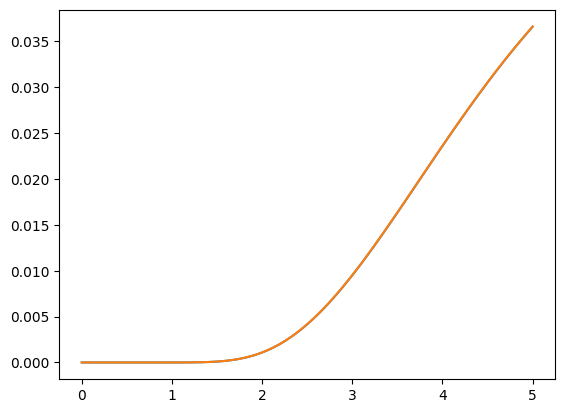

In [29]:
plt.plot(np.linspace(0, 5, 100), fpt1(np.linspace(0, 5, 100)));
plt.plot(np.linspace(0, 5, 100), fpt2(np.linspace(0, 5, 100)));